In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import pandas as pd 
import seaborn as sns

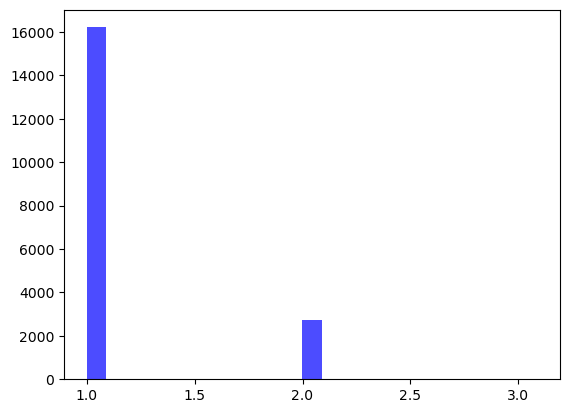

In [3]:


file = uproot.open("dati/full_bigdet_bigphantom/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

annihil_data = data[data["processName"] == "annihil"]
brems_data = data[data["processName"] == "eBrem"]
#brems_data = brems_data[brems_data["energy"] >= 0.4]
#brems_data = brems_data[brems_data["energy"] <= 0.6]

# Group the filtered data by event and parentID, then count occurrences
grouped_data = annihil_data.groupby(["evt", "parentID"]).size().reset_index(name="count")

grouped_data_brem = brems_data.groupby(["evt"]).size().reset_index(name="count")

#print(grouped_data.head())

bins = [0.999, 1.09, 1.9999,2.09,2.9999, 3.09]

#plt.hist(grouped_data_brem["count"], bins=bins, label="brem", alpha=0.7, color="red")
plt.hist(grouped_data["count"], bins=bins, label="annihil", alpha=0.7, color="blue")
plt.show()

#print(np.shape(grouped_data[grouped_data["count"]==2])[0])
#
#print(np.shape(grouped_data_brem)[0])
#
#x=[0]
#plt.scatter(x,np.shape(grouped_data[grouped_data["count"]==2])[0],label="annihil_pair")
#plt.scatter(x,np.shape(grouped_data_brem)[0],label="brem")
#plt.legend()

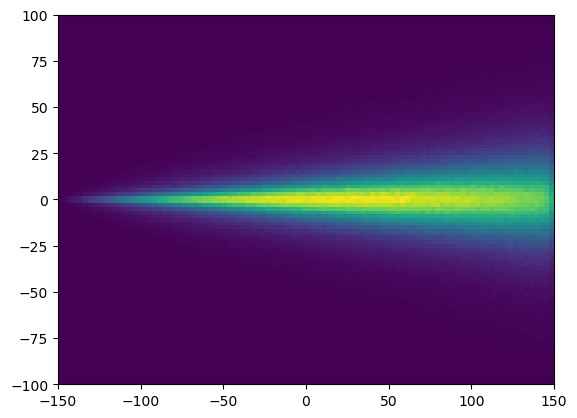

In [38]:
dt = np.genfromtxt('dati/full/annihilation_positions.csv', delimiter=',')


# Calculate depth (assuming depth is the z-coordinate)
x_values = dt[:,0]
z_values = dt[:,2]
y_values = dt[:,1]  


plt.hist2d(x_values,y_values, bins=100, range=[[-150, 150], [-100, 100]], cmap='viridis')
plt.show()

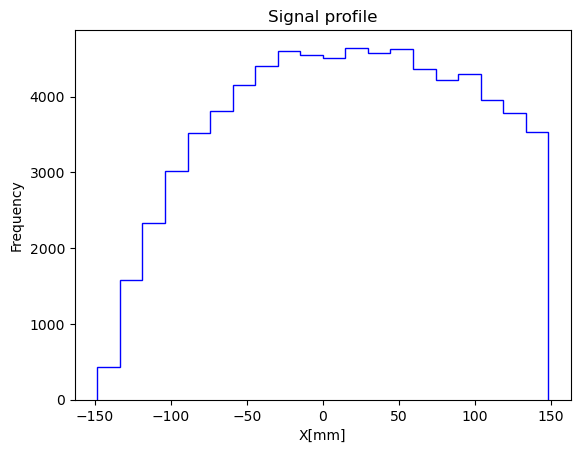

In [42]:
hist2d, x_edges, y_edges = np.histogram2d(x_values, y_values, bins=(100, 100), range=[[-150, 150], [-20, 20]])

slice_index = 50

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=20,histtype='step')

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Signal profile')

# Show the plot
plt.show()

TRUECOINC

In [4]:
pairs = pd.merge(data[(data['z'] > 0) & (data['processName'] == 'annihil')],
                 data[(data['z'] < 0) & (data['processName'] == 'annihil')], on='evt')

# Filter pairs with the same event number and a TOF difference < 2ns and same parent ID
#pairs = pairs[(pairs['parentID_x'] == pairs['parentID_y'])]




In [82]:
#tolerance = 10  # You can adjust the tolerance as needed
#
#pairs.loc[(abs(pairs['y_x']) < tolerance) & (abs(pairs['y_y']) < tolerance), ['y_x', 'y_y']] = 0
#
#pairs = pairs.loc[(pairs['y_x'] == 0) & (pairs['y_y'] == 0)]
#
## Reset index if needed
#pairs.reset_index(drop=True, inplace=True)

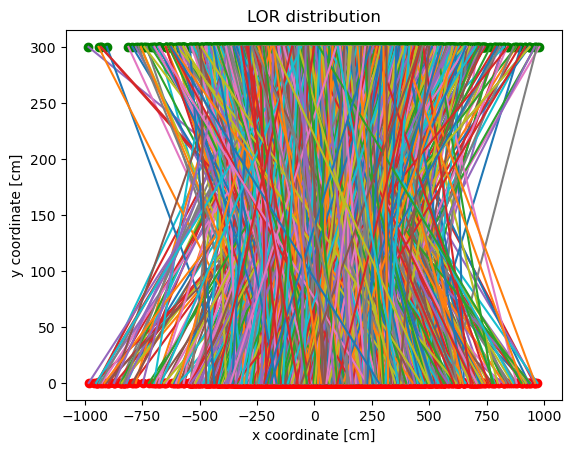

In [5]:

x1 = np.array(pairs['x_x']) # X positions of the first scintillator
x2 = np.array(pairs['x_y']) # X positions of the second scintillator

# Calculate the midpoint between the two scintillators
midpoint = (x1 + x2) / 2

# Calculate the slope of the line connecting the two scintillators
slope = (x2 - x1)

# Calculate the y-intercept of the line connecting the two scintillators
intercept = np.zeros_like(midpoint)  
# Distance between the scintillators
distance = 300.0  # cm

y_values = np.zeros_like(x1)  



for i in range(len(x1)):
    x_values = np.array([x1[i], x2[i]])
    plt.plot(x_values, y_values[i] + np.array([0, distance]))

plt.scatter(x1, y_values, c='r')
plt.scatter(x2, y_values + distance, c='g')

plt.xlabel('x coordinate [cm]')
plt.ylabel('y coordinate [cm]')
plt.title('LOR distribution')
plt.show()
y=np.linspace(-150,150,300)



lines1 = [LineString([(x1[i], -150), (x2[i], 150)]) for i in range(len(x2))]
lines2 = [LineString([(-1000, y[j]), (1000, y[j])]) for j in range(len(y))]

distry=np.zeros((len(x1),len(y)))
# Loop through and calculate intersections
for j in range(len(y)):
    for i in range(len(x2)):
        x = (lines1[i].intersection(lines2[j])).x
        distry[i, j] = x
      

[]

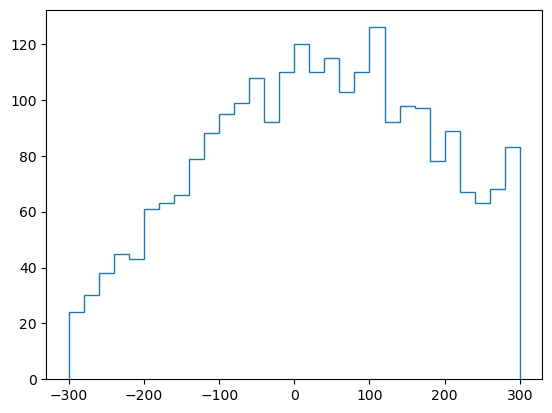

In [143]:
y=np.linspace(-150,150,1)

lines1 = [LineString([(x1[i], -150), (x2[i], 150)]) for i in range(len(x2))]
lines2 = [LineString([(-1000, 0), (1000, 0)]) for j in range(len(y))]

distry=np.zeros((len(x1),len(y)))
# Loop through and calculate intersections
for j in range(len(y)):
    for i in range(len(x2)):
        x = (lines1[i].intersection(lines2[j])).x
        distry[i, j] = x

plt.hist(distry,bins=30,range=[-300,300],histtype='step')
plt.plot()

(array([  99.,  258.,  585.,  918., 1271., 1410., 1618., 1754., 1872.,
         429.]),
 array([-200., -160., -120.,  -80.,  -40.,    0.,   40.,   80.,  120.,
         160.,  200.]),
 <BarContainer object of 10 artists>)

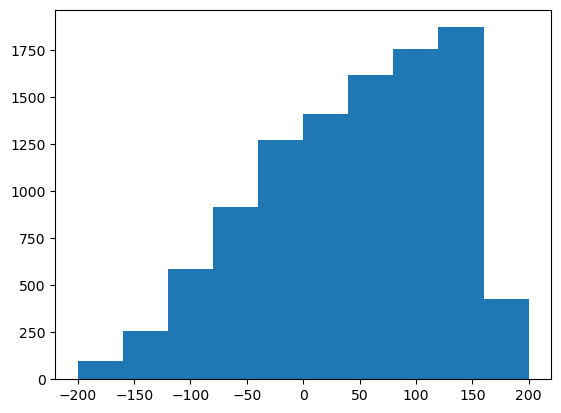

In [102]:
print(distry)

[[-3.54649133e+01 -3.51395244e+01 -3.48141354e+01 ... -3.90218442e+00
  -3.57679546e+00 -3.25140651e+00]
 [ 1.80793837e+01  1.68164317e+01  1.55534798e+01 ... -1.04426958e+02
  -1.05689910e+02 -1.06952862e+02]
 [ 2.51190254e+02  2.51277690e+02  2.51365125e+02 ...  2.59671472e+02
   2.59758907e+02  2.59846343e+02]
 ...
 [-1.87616497e+01 -1.83220832e+01 -1.78825167e+01 ...  2.38763003e+01
   2.43158668e+01  2.47554333e+01]
 [-1.06658894e+02 -1.05135030e+02 -1.03611165e+02 ...  4.11559696e+01
   4.26798342e+01  4.42036988e+01]
 [ 1.06272691e+02  1.05189068e+02  1.04105445e+02 ...  1.16129581e+00
   7.76731792e-02 -1.00594945e+00]]


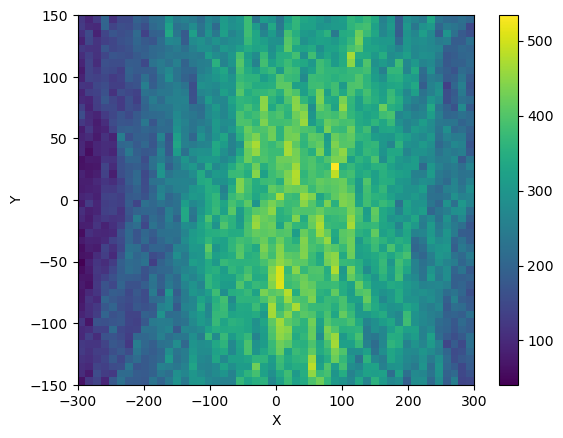

In [7]:
y = np.linspace(-150,150,distry.shape[1])
#plt.figure(figsize=(10,10))

x_flattened = distry.flatten()
y_flattened = np.tile(y, distry.shape[0])

mask = ~np.isnan(x_flattened)
x_filtered1 = x_flattened[mask]
y_filtered1 = y_flattened[mask]

plt.hist2d(x_filtered1, y_filtered1, bins=[50,50], cmap='viridis',range=[[-300,300],[-150,150]])

plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')

plt.show()





In [253]:
sns.kdeplot(x=x_filtered1, y=y_filtered1)

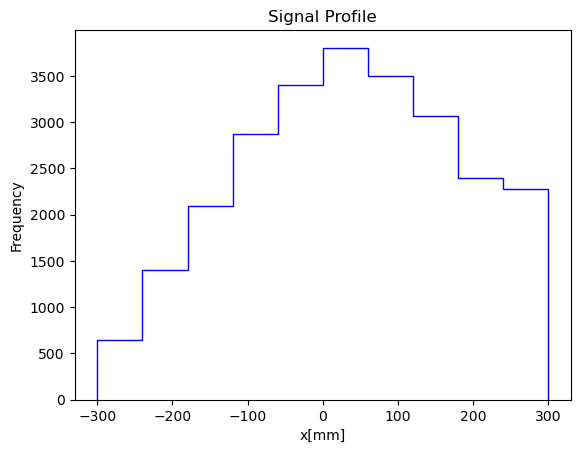

In [199]:
hist2d, x_edges, y_edges = np.histogram2d(x_filtered1, y_filtered1, bins=(30, 30))

slice_index = 15

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=10,histtype='step',range=[-300,300])

# Add labels and title
plt.xlabel('x[mm]')
plt.ylabel('Frequency')
plt.title('Signal Profile')

# Show the plot
plt.show()

TUTTI EVT

In [117]:
pairs = pd.merge(data[(data['z'] > 0)],
                 data[(data['z'] < 0)], on='evt')# Filter pairs with the same event number and a TOF difference < 2ns
pairs = pairs[(pairs['TOF_x'] - pairs['TOF_y']).abs() < 2]


In [118]:

x1 = np.array(pairs['x_x']) # X positions of the first scintillator
x2 = np.array(pairs['x_y']) # X positions of the second scintillator

# Calculate the midpoint between the two scintillators
midpoint = (x1 + x2) / 2

# Calculate the slope of the line connecting the two scintillators
slope = (x2 - x1)

# Calculate the y-intercept of the line connecting the two scintillators
intercept = np.zeros_like(midpoint)  
# Distance between the scintillators
distance = 400.0  # cm

y_values = np.zeros_like(x1)  



for i in range(len(x1)):
    x_values = np.array([x1[i], x2[i]])
    plt.plot(x_values, y_values[i] + np.array([0, distance]))

plt.scatter(x1, y_values, c='r')
plt.scatter(x2, y_values + distance, c='g')

plt.xlabel('x coordinate [cm]')
plt.ylabel('y coordinate [cm]')
plt.title('LOR distribution')
plt.show()




      


In [ ]:
lines1 = [LineString([(x1[i], -200), (x2[i], 200)]) for i in range(len(x2))]
lines2 = [LineString([(-150, y[j]), (150, y[j])]) for j in range(len(y))]

y=np.linspace(-100,100,100)
distry=np.zeros((len(x1),len(y)))
# Loop through and calculate intersections
for j in range(len(y)):
    for i in range(len(x2)):
        x = (lines1[i].intersection(lines2[j])).x
        distry[i, j] = x

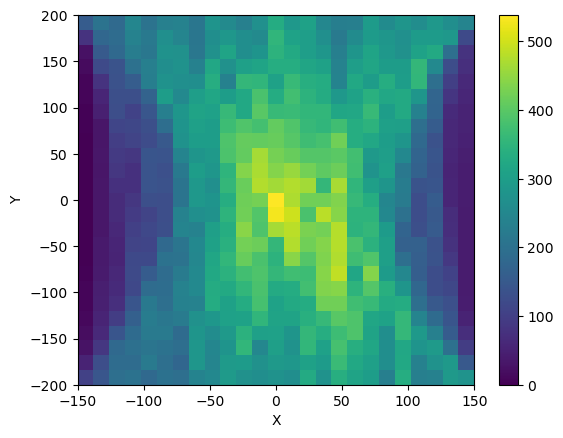

In [ ]:
y = np.linspace(-200,200,distry.shape[1])

x_flattened = distry.flatten()
y_flattened = np.tile(y, distry.shape[0])

mask = ~np.isnan(x_flattened)
x_filtered1 = x_flattened[mask]
y_filtered1 = y_flattened[mask]

plt.hist2d(x_filtered1, y_filtered1, bins=[25,25], cmap='viridis',range=[[-150,150],[-200,200]])

plt.colorbar()

plt.xlabel('X')
plt.ylabel('Y')

plt.show()



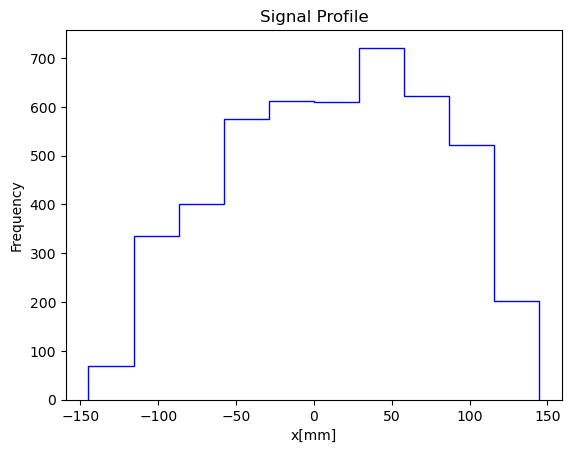

In [ ]:
hist2d, x_edges, y_edges = np.histogram2d(x_filtered1, y_filtered1, bins=(30, 30))

slice_index = 5

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=10,histtype='step')

# Add labels and title
plt.xlabel('x[mm]')
plt.ylabel('Frequency')
plt.title('Signal Profile')

# Show the plot
plt.show()

custom

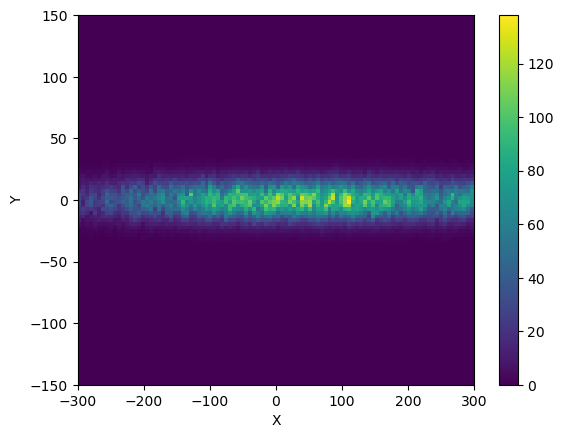

In [26]:
def custom_weighting_function(x, y):
    # You can adjust the parameters in the following formula to suit your specific criteria
    weight =  np.exp( 7* y**2*-0.0006)*np.exp(0.000001*x**2)
    return weight

# Use the custom weighting function in your code
weights = custom_weighting_function(x_filtered1, y_filtered1)

plt.hist2d(x_filtered1, y_filtered1, bins=[100, 100], cmap='viridis', range=[[-300, 300], [-150, 150]], weights=weights)

plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

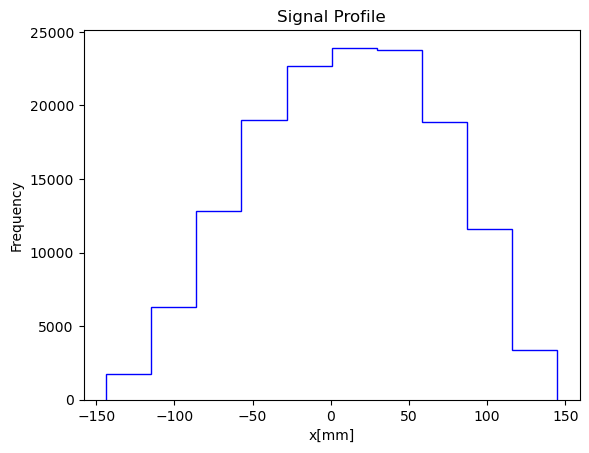

In [ ]:
hist2d, x_edges, y_edges = np.histogram2d(x_filtered1, y_filtered1, bins=(30, 30))

slice_index = 5

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=10,histtype='step')

# Add labels and title
plt.xlabel('x[mm]')
plt.ylabel('Frequency')
plt.title('Signal Profile')

# Show the plot
plt.show()